In [1]:
import numpy as np
# import pathogenprofiler as pp
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score
# import fastq2matrix as fm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from scipy.stats import norm
import subprocess
from scipy.stats import kurtosis, skew
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from cb91visuals import *

In [2]:
vcf_file = 'test_data/ERR6634978-ERR6635032-2080.vcf.gz'
json_file = 'test_data/ERR6634978-ERR6635032-2080.results.json'

In [3]:
VCF_FILE_PATH='/mnt/storage7/lwang/trial_tb_philippines/data/processed/seqtk/freebayesVCF/'
#/mnt/storage7/lwang/trial_tb_philippines/data/processed/seqtk/freebayesVCF/q20
JSON_FILE_PATH='/mnt/storage7/lwang/trial_tb_philippines/data/processed/seqtk/freebayesVCF/results'
#/mnt/storage7/lwang/trial_tb_philippines/data/processed/seqtk/freebayesVCF/q20/results

NAME_FILE='/mnt/storage7/lwang/trial_tb_philippines/data/seqtk/sample_name.txt'

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu


None


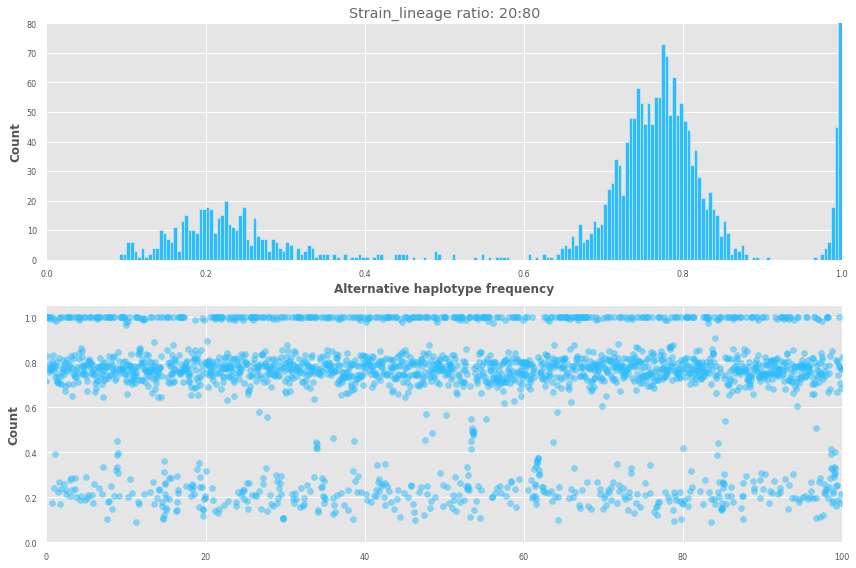

In [4]:
model_predictions = []

def model_pred(vcf_file, ratio='test'):
    with open('mix_infection.csv', 'w') as f:
        subprocess.run("bcftools view -c 1 -m2 -M2 -T ^new_exclusion.bed %s | bcftools query -f '%%POS\\t%%REF\\t%%ALT[\\t%%GT\\t%%AD\\n]'" % vcf_file, shell=True, stdout=f, text=True)

#count how many column there is in the ROAO_proportion.csv file this is needed in order to read the csv in a a panda dataframe
    pos = []
    freqs = []
    with open('mix_infection.csv', 'r') as f:
        for l in f:
            row = l.strip().split()
            ads = [int(x) for x in row[4].split(",")]
            afs = [x/sum(ads) for x in ads]
            pos.append(int(row[0]))
            freqs.append(afs[1])
        
    with plt.style.context('ggplot'):

        fig, ax= plt.subplots(figsize=(12, 8), ncols=1, nrows=2)

        ax[0].hist(freqs, bins=200, color=CB91_Blue)
        ax[0].set_ylim([0,80])
        ax[0].set_xlim([0,1])
        ax[0].set_xlabel('Alternative haplotype frequency')
        ax[0].set_ylabel('Count')

        ax[0].set_title(f'Strain_lineage ratio: {ratio}')
        list_=np.linspace(0,100,len(freqs))
        ax[1].scatter(list_, freqs, alpha = 0.5, color=CB91_Blue)
        ax[1].set_ylim([0,1.05])
        ax[1].set_xlim([0,100])
        ax[1].set_ylabel('Count')

        
        # plt.legend(frameon=False)
        ax[0].grid('on')
        ax[1].grid('on')

        fig.tight_layout()
        fig.show()

print(model_pred(vcf_file, ratio='20:80'))


/tmp/ipykernel_128340/4049556083.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax= plt.subplots(figsize=(12, 8), ncols=1, nrows=2)


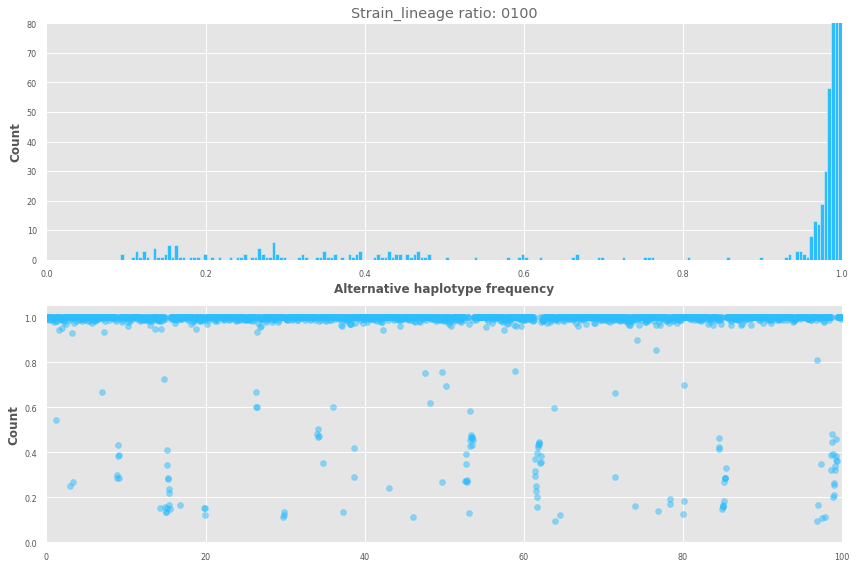

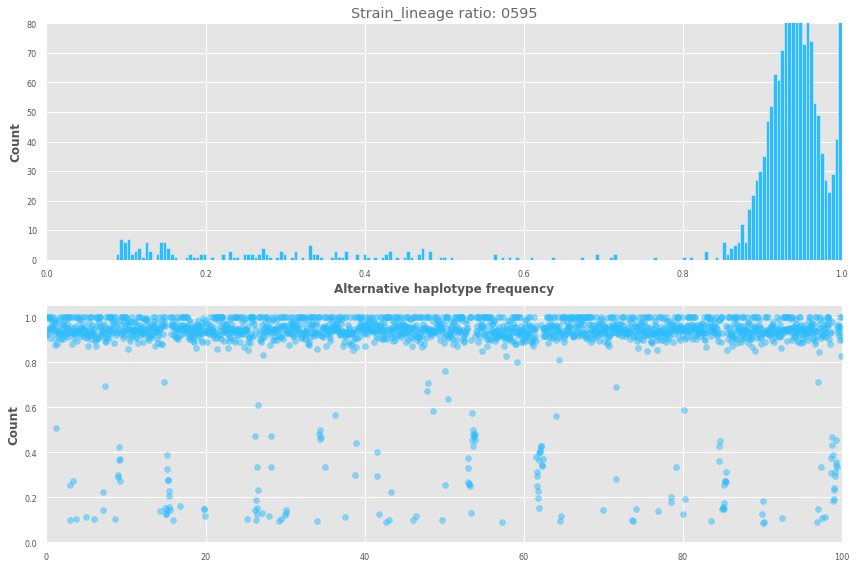

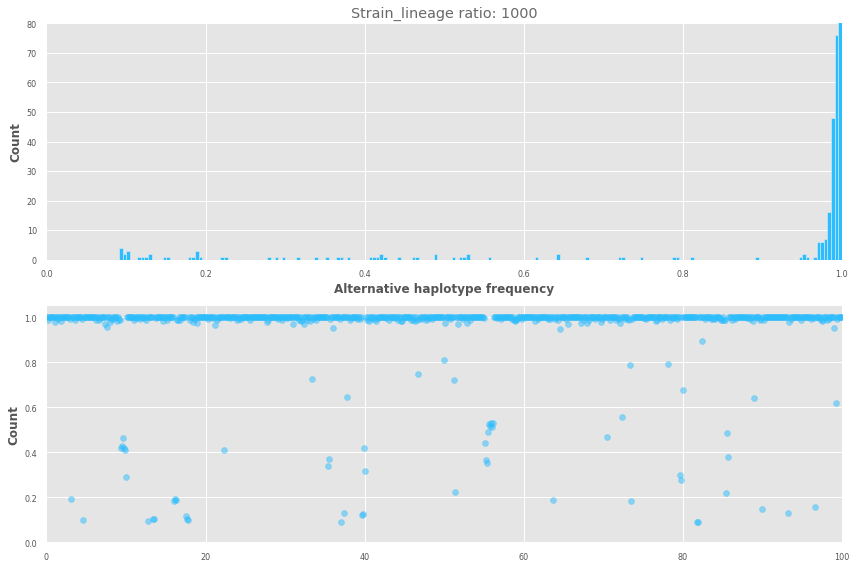

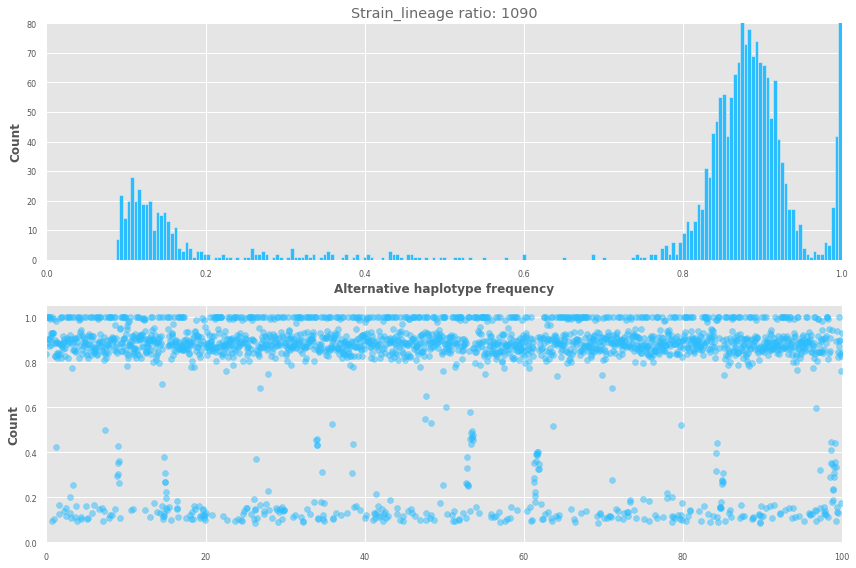

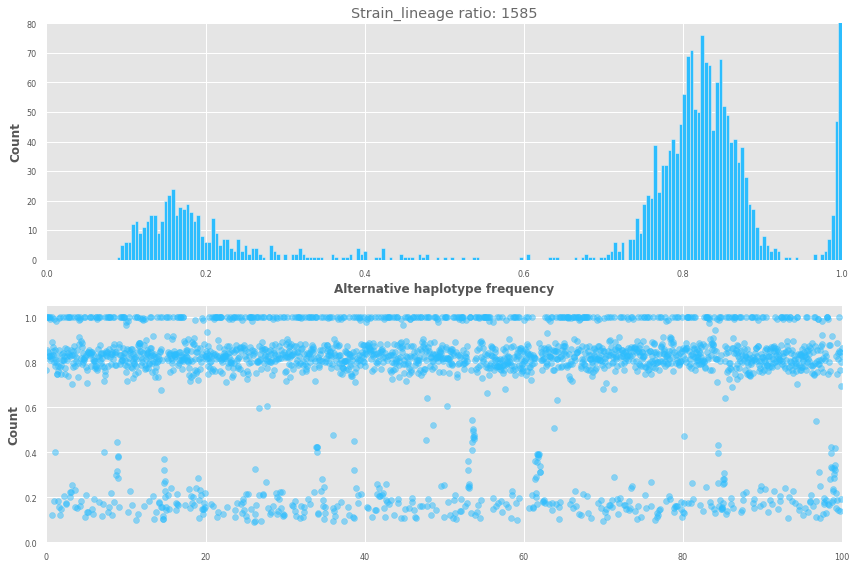

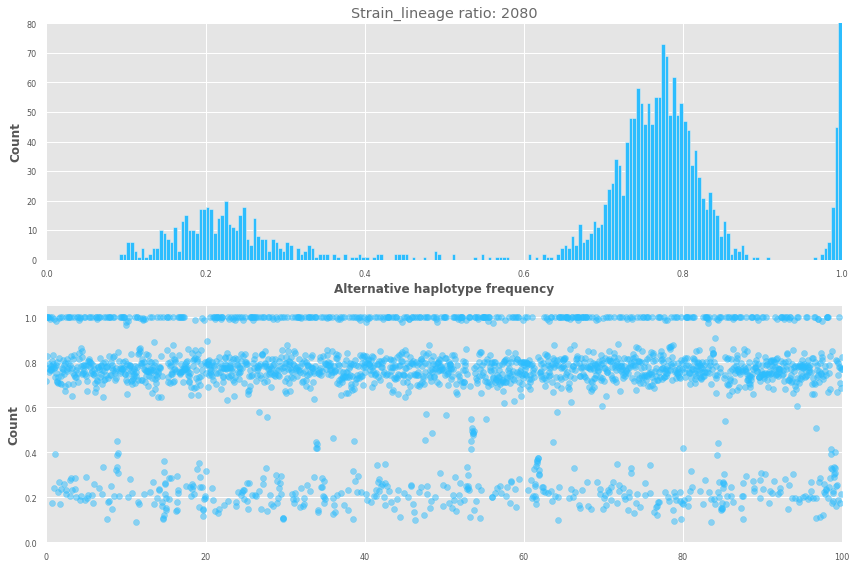

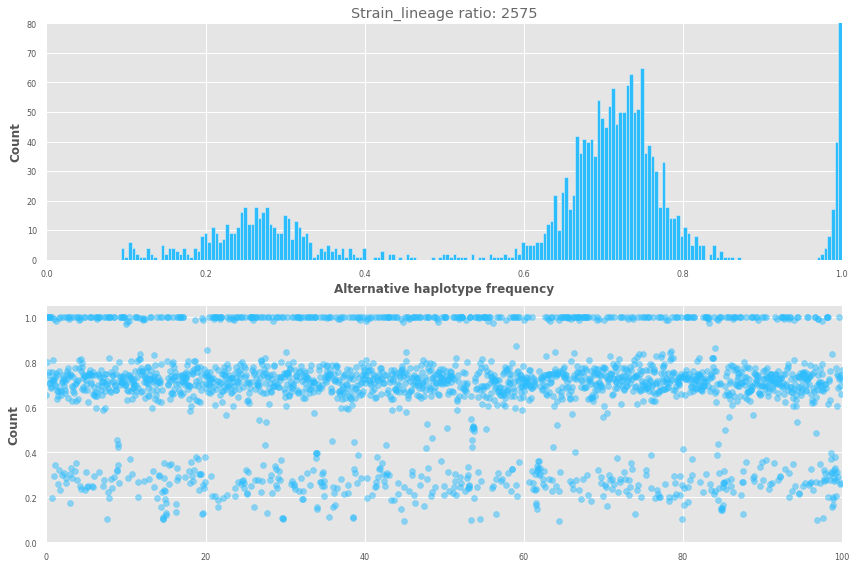

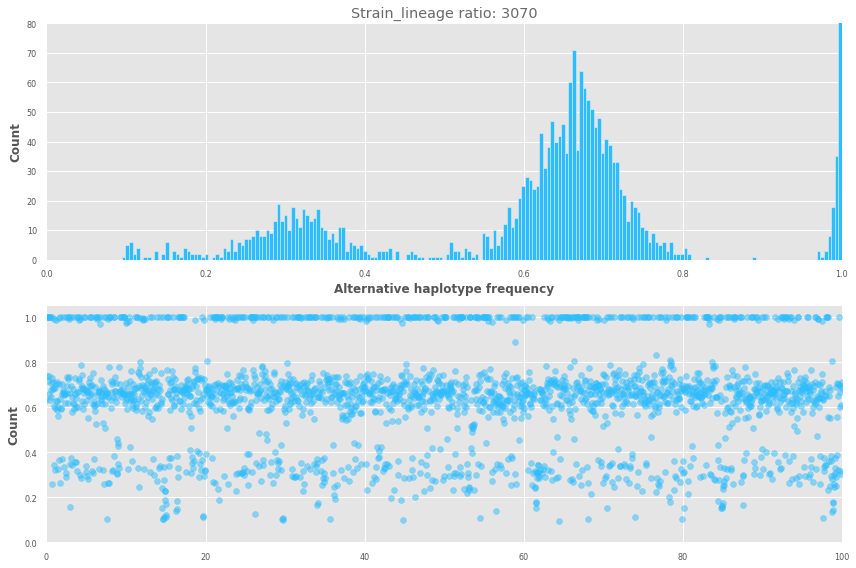

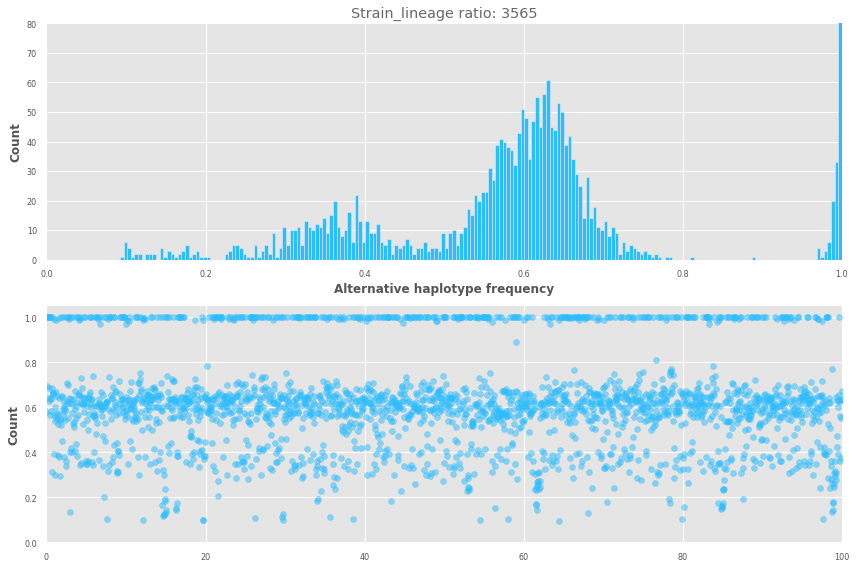

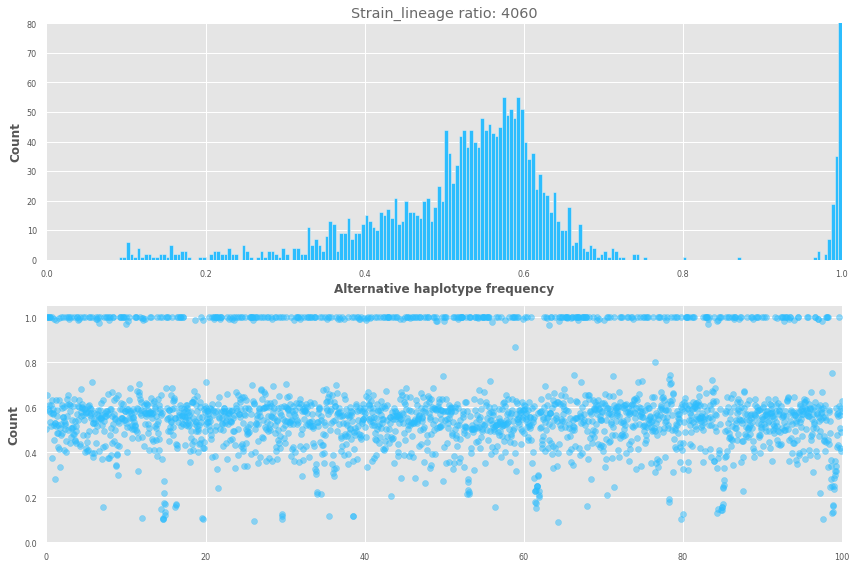

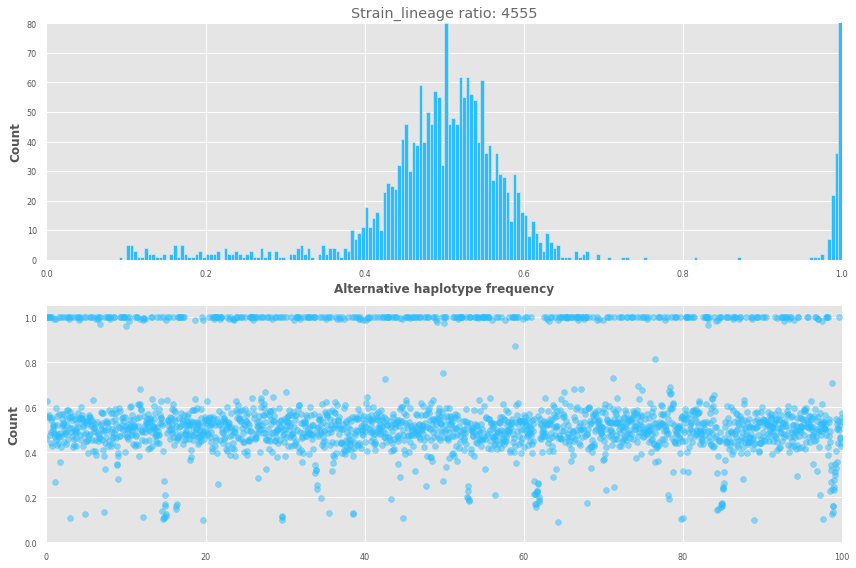

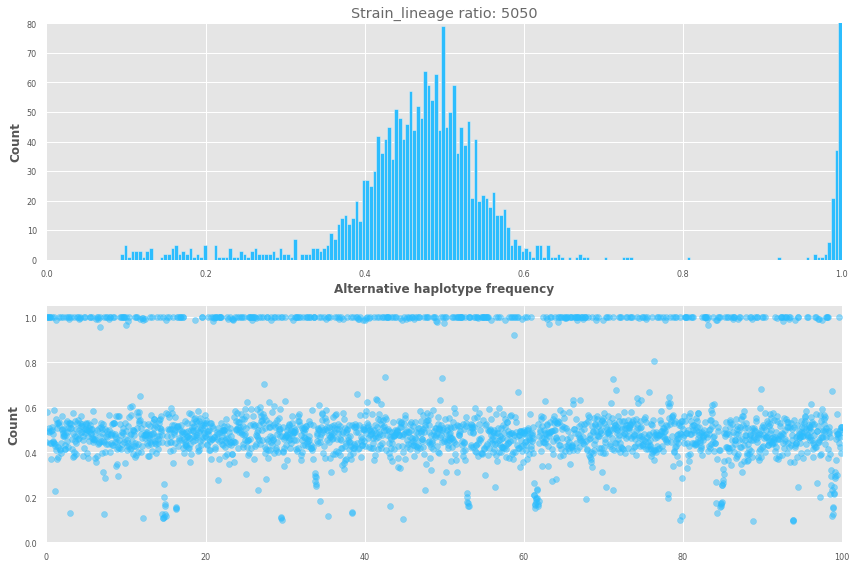

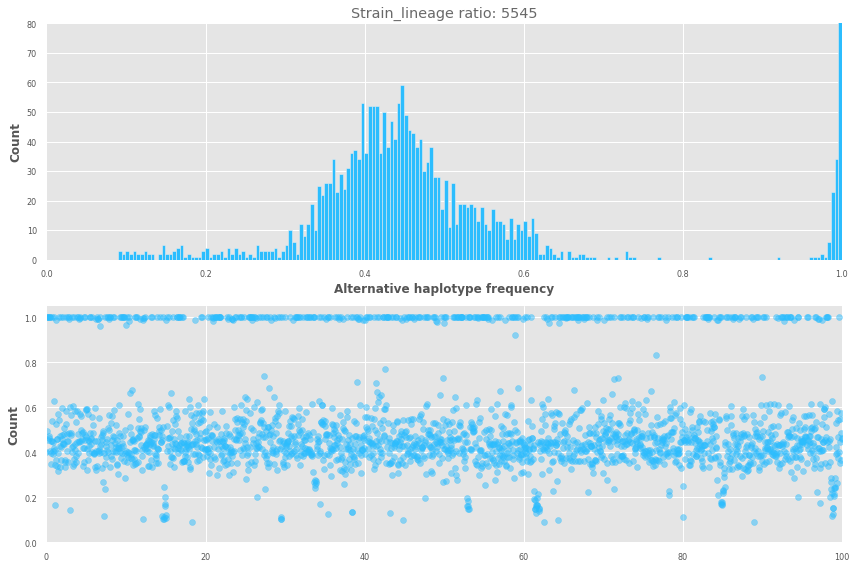

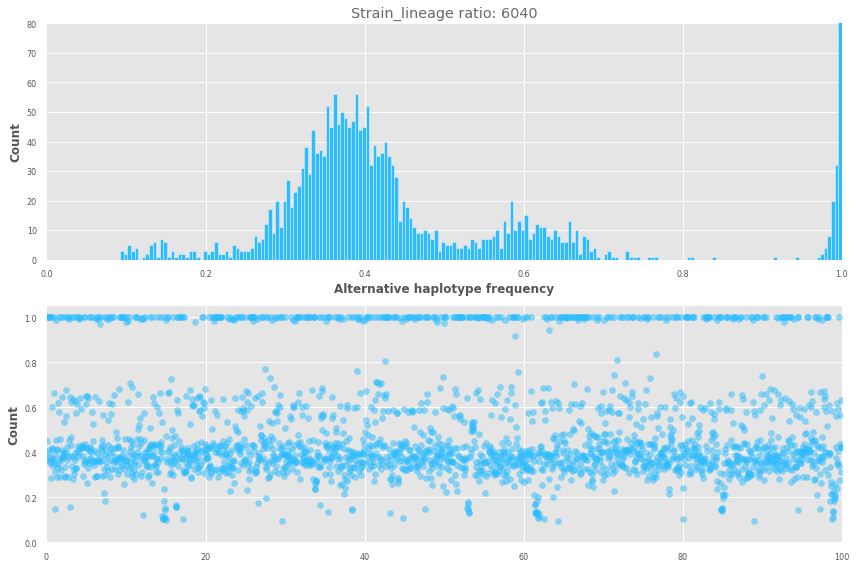

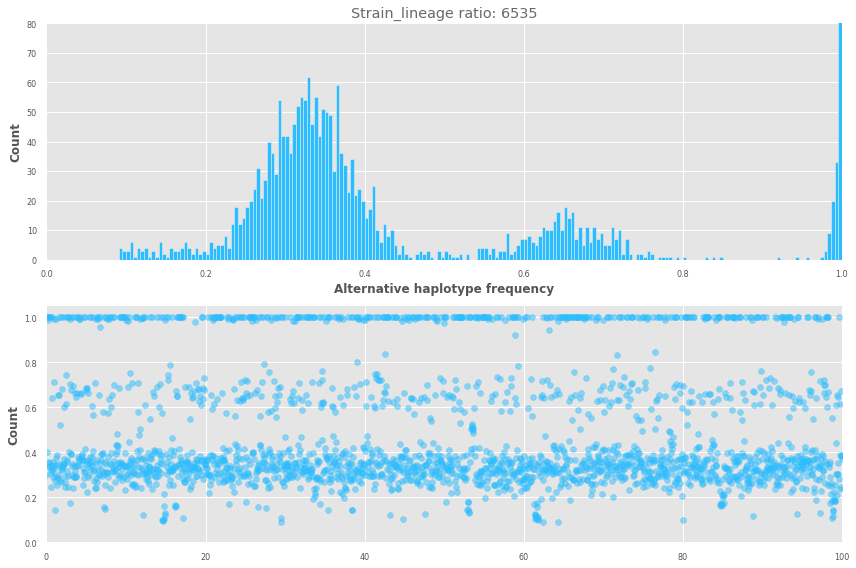

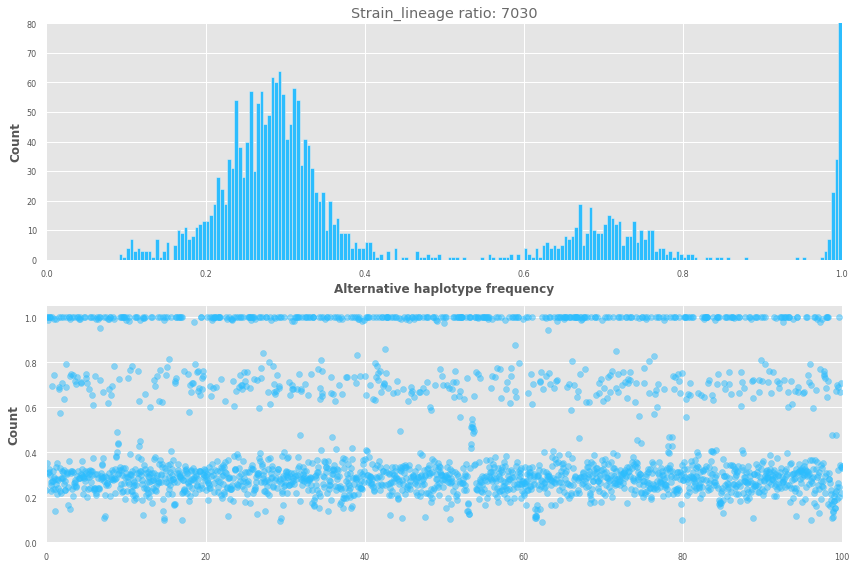

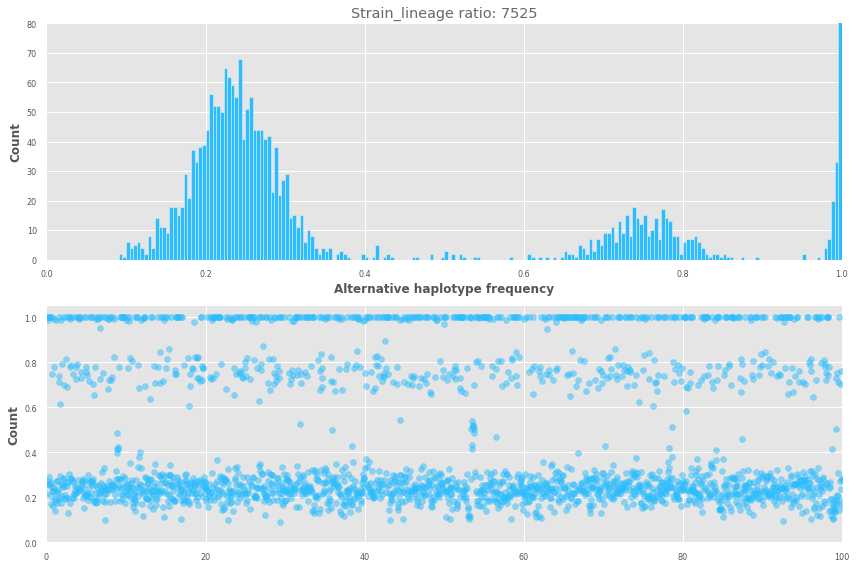

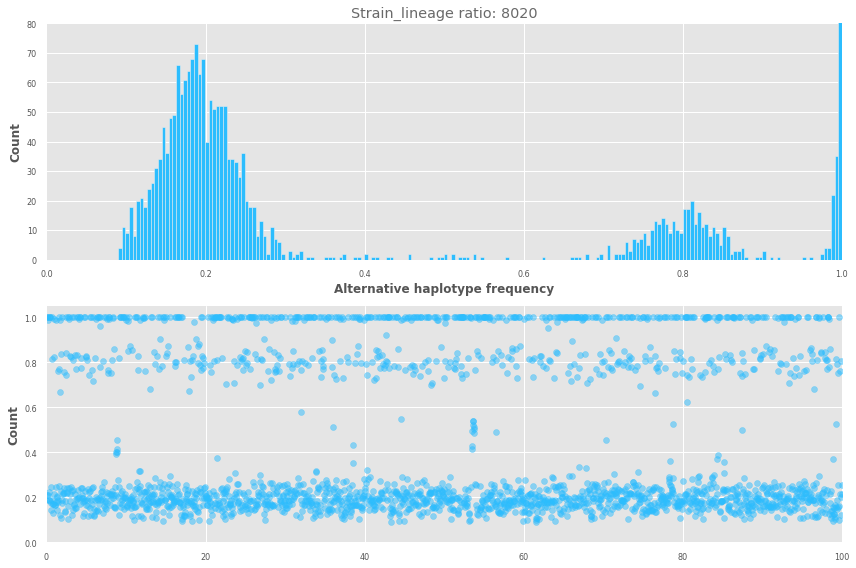

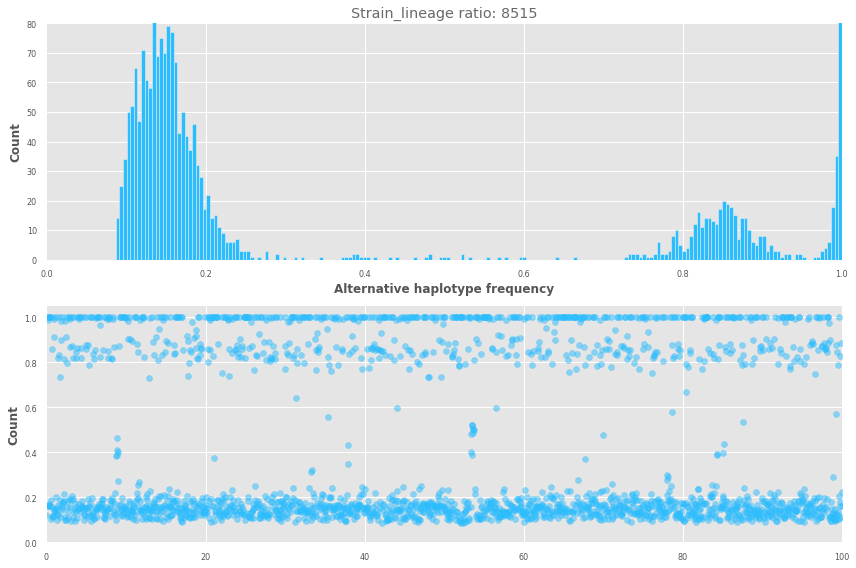

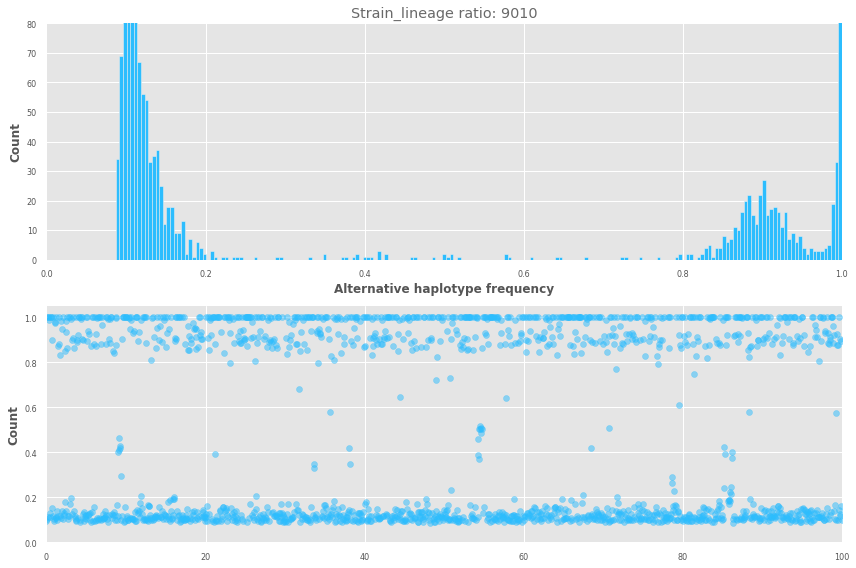

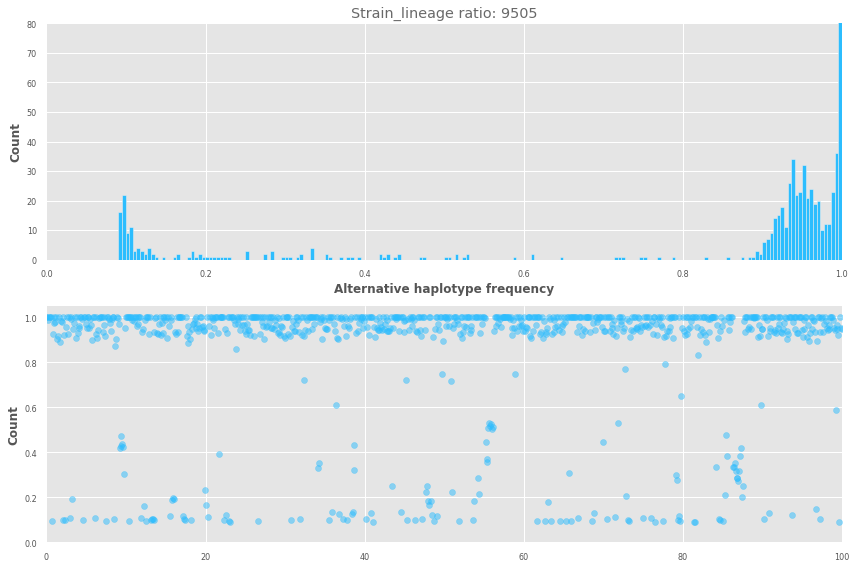

In [5]:
def frac_MSE(NAME_FILE=NAME_FILE, JSON_FILE_PATH=JSON_FILE_PATH, VCF_FILE_PATH=VCF_FILE_PATH):
    with open(NAME_FILE, 'r') as f:
        sample_list = [line.rstrip('\n') for line in f]

        sample_list_json=[]
        for i,x in enumerate(sample_list):
            x = list(x)
            x.append('.results.json')
            string = ''.join([letter for letter in x] )
            sample_list_json.append(string)
        

        sample_list_vcf=[]
        for i,x in enumerate(sample_list):
            x = list(x)
            x.append('.vcf.gz') 
            string = ''.join([letter for letter in x] )
            sample_list_vcf.append(string)
        ratio = []
        for i in sample_list_json:
            temp = i.split('-')
            ratio.append(temp[2])
        
        ratio1=[]
        for i in ratio:
            temp = i.split('.')
            ratio1.append(temp[0])

        ratio = ratio1

        tb_profiler_predictions = []
        model_predictions = []

        for j, vcf, ratio in zip(sample_list_json, sample_list_vcf, ratio):
            VCF_FILE = os.path.join(VCF_FILE_PATH, vcf)
            model_pred(VCF_FILE, ratio=ratio)


frac_MSE()